In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebr
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# use for model saving
import pickle

#ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# preprocessing on tweets
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import string
# For Extracting only the alphabetic data
import re

from nltk.tokenize import RegexpTokenizer
# from wordcloud import WordCloud

# For the plotting of the metrics
import matplotlib.pyplot as plt
import seaborn as sns

# For the Machine Learning Model Implementation
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.semi_supervised import SelfTrainingClassifier # for Semi-Supervised learning
from sklearn.preprocessing import LabelEncoder

#split the data into training and testing
from sklearn.model_selection import train_test_split

# Vectorizing the Data into  numeric format
from sklearn.feature_extraction.text import TfidfVectorizer
# For the model Evaluations
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, precision_score, f1_score, recall_score

from tabulate import tabulate  # dataframe to table
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc

#for improving accuracy
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/thesis code/Suicide_Detection.csv")
df_train.columns = ['id',"text","label"]
df_train=df_train[["text","label"]]
#data_split = np.array_split(df_train, 8)
# Show the first 5 rows of the dataframe.
print('....Training data....\n')
display(df_train)

....Training data....



,text,label
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


In [ ]:
df_train["label"].value_counts()

suicide        116037
non-suicide    116037
Name: label, dtype: int64

In [ ]:
le = LabelEncoder()
labels=le.fit_transform(df_train.label)
df_train.label=labels
df_train

,text,label
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...
232069,If you don't like rock then your not going to ...,0
232070,You how you can tell i have so many friends an...,0
232071,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,The usual stuff you find hereI'm not posting t...,1


In [ ]:
# information about the data set like columns , null values , datatype ,range index, memory
print('\n...........information of training data............\n')
print(df_train.info())


...........information of training data............

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   label   232074 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.5+ MB
None


In [ ]:
print("\n...Training.....\n")
print(df_train.isna().sum())


...Training.....

text     0
label    0
dtype: int64



...Training.....

1    116037
0    116037
Name: label, dtype: int64


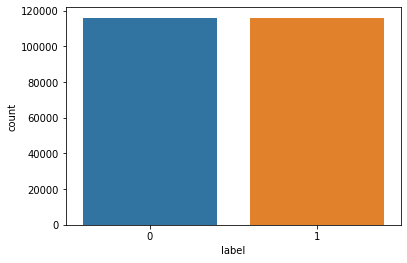

In [ ]:
# show the number of labels in dataset per class in visualize in bar graph
print("\n...Training.....\n")
print(df_train['label'].value_counts())

sns.countplot(data=df_train,x='label')


## **Preprocessing**

In [ ]:
dataset=df_train
dataset

,text,label
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...
232069,If you don't like rock then your not going to ...,0
232070,You how you can tell i have so many friends an...,0
232071,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,The usual stuff you find hereI'm not posting t...,1


In [ ]:
# checkeing the each tweet in dataset if there is any capital word in tweet this piece of will replace it with the small letter
dataset['text']=dataset['text'].str.lower()
dataset.head(10)

,text,label
0,ex wife threatening suiciderecently i left my ...,1
1,am i weird i don't get affected by compliments...,0
2,finally 2020 is almost over... so i can never ...,0
3,i need helpjust help me im crying so hard,1
4,"i’m so losthello, my name is adam (16) and i’v...",1
5,honetly idki dont know what im even doing here...,1
6,[trigger warning] excuse for self inflicted bu...,1
7,it ends tonight.i can’t do it anymore. \ni quit.,1
8,"everyone wants to be ""edgy"" and it's making me...",0
9,my life is over at 20 years oldhello all. i am...,1


## Remove stopwords

In [ ]:
# this piece of code remove every stop words in the tweets in dataset. the stop words are given in the stopword list below
# we create a function that spilit the each in to  words and check the stopword init if find then remove this.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head(10)

0    ex wife threatening suiciderecently left wife ...
1    weird don't get affected compliments it's comi...
2    finally 2020 almost over... never hear "2020 b...
3                    need helpjust help im crying hard
4    i’m losthello, name adam (16) i’ve struggling ...
5    honetly idki dont know im even here. feel like...
6    [trigger warning] excuse self inflicted burns*...
7                  ends tonight.i can’t anymore. quit.
8    everyone wants "edgy" it's making self conscio...
9    life over 20 years oldhello all. 20 year old b...
Name: text, dtype: object

## Remove punctuations

In [ ]:
# this piece of code check the each tweets in dataset and remove every punctuation in the whole dataset
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].head(10)

0    ex wife threatening suiciderecently left wife ...
1    weird dont get affected compliments its coming...
2    finally 2020 almost over never hear 2020 bad y...
3                    need helpjust help im crying hard
4    i’m losthello name adam 16 i’ve struggling yea...
5    honetly idki dont know im even here feel like ...
6    trigger warning excuse self inflicted burnsi k...
7                     ends tonighti can’t anymore quit
8    everyone wants edgy its making self conscious ...
9    life over 20 years oldhello all 20 year old ba...
Name: text, dtype: object

## Remove repeating character

In [ ]:
# this piece of code remove the repeating characters in dataset
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].head(10)

0    ex wife threatening suiciderecently left wife ...
1    weird dont get affected compliments its coming...
2    finally 2020 almost over never hear 2020 bad y...
3                    need helpjust help im crying hard
4    i’m losthello name adam16 i’ve struggling year...
5    honetly idki dont know im even here feel like ...
6    trigger warning excuse self inflicted burnsi k...
7                     ends tonighti can’t anymore quit
8    everyone wants edgy its making self conscious ...
9    life over 20 years oldhello all 20 year old ba...
Name: text, dtype: object

## Removing URLs

In [ ]:
# this piece of code remove the urls from dataset,itterate each tweet if there is any urls remove the url
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].head(10)

0    ex wife threatening suiciderecently left wife ...
1    weird dont get affected compliments its coming...
2    finally 2020 almost over never hear 2020 bad y...
3                    need helpjust help im crying hard
4    i’m losthello name adam16 i’ve struggling year...
5    honetly idki dont know im even here feel like ...
6    trigger warning excuse self inflicted burnsi k...
7                     ends tonighti can’t anymore quit
8    everyone wants edgy its making self conscious ...
9    life over 20 years oldhello all 20 year old ba...
Name: text, dtype: object

## Remove numbers from text

In [ ]:
# this piece of code remove the numaric number from dataset,itterate each tweet if there is any numaric number remove the numaric number
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].head(10)

0    ex wife threatening suiciderecently left wife ...
1    weird dont get affected compliments its coming...
2    finally  almost over never hear  bad year ever...
3                    need helpjust help im crying hard
4    i’m losthello name adam i’ve struggling years ...
5    honetly idki dont know im even here feel like ...
6    trigger warning excuse self inflicted burnsi k...
7                     ends tonighti can’t anymore quit
8    everyone wants edgy its making self conscious ...
9    life over  years oldhello all  year old baldin...
Name: text, dtype: object

## Tokenization of text

In [ ]:
# in this piece of code we create the tokens of each tweet in genral token means a word in tweet
tokenizer = RegexpTokenizer('\s+', gaps = True)
dataset['text'] = dataset['text'].apply(str)
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset.head(10)

,text,label
0,"[ex, wife, threatening, suiciderecently, left,...",1
1,"[weird, dont, get, affected, compliments, its,...",0
2,"[finally, almost, over, never, hear, bad, year...",0
3,"[need, helpjust, help, im, crying, hard]",1
4,"[i’m, losthello, name, adam, i’ve, struggling,...",1
5,"[honetly, idki, dont, know, im, even, here, fe...",1
6,"[trigger, warning, excuse, self, inflicted, bu...",1
7,"[ends, tonighti, can’t, anymore, quit]",1
8,"[everyone, wants, edgy, its, making, self, con...",0
9,"[life, over, years, oldhello, all, year, old, ...",1


# Apply stemming

In [ ]:
"""stemming is process to get the root word  called ad  token in above cell like if word is studies its will convert it in to study,
without repect to grammar"""
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset.head(10)

,text,label
0,"[ex, wife, threatening, suiciderecently, left,...",1
1,"[weird, dont, get, affected, compliments, its,...",0
2,"[finally, almost, over, never, hear, bad, year...",0
3,"[need, helpjust, help, im, crying, hard]",1
4,"[i’m, losthello, name, adam, i’ve, struggling,...",1
5,"[honetly, idki, dont, know, im, even, here, fe...",1
6,"[trigger, warning, excuse, self, inflicted, bu...",1
7,"[ends, tonighti, can’t, anymore, quit]",1
8,"[everyone, wants, edgy, its, making, self, con...",0
9,"[life, over, years, oldhello, all, year, old, ...",1


## Apply lemmatization

In [ ]:
"""lemmatizing is process to get the root word  called ad  token in above cell like if word is studies its will convert it in to study,
with repect to grammar"""
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset.head(10)

,text,label
0,"[ex, wife, threatening, suiciderecently, left,...",1
1,"[weird, dont, get, affected, compliments, its,...",0
2,"[finally, almost, over, never, hear, bad, year...",0
3,"[need, helpjust, help, im, crying, hard]",1
4,"[i’m, losthello, name, adam, i’ve, struggling,...",1
5,"[honetly, idki, dont, know, im, even, here, fe...",1
6,"[trigger, warning, excuse, self, inflicted, bu...",1
7,"[ends, tonighti, can’t, anymore, quit]",1
8,"[everyone, wants, edgy, its, making, self, con...",0
9,"[life, over, years, oldhello, all, year, old, ...",1


## Join all tokens in to a string

In [ ]:
new_data=dataset
new_data['text'] = dataset['text'].apply(lambda x: ' '.join(x) )
new_data

,text,label
0,ex wife threatening suiciderecently left wife ...,1
1,weird dont get affected compliments its coming...,0
2,finally almost over never hear bad year ever a...,0
3,need helpjust help im crying hard,1
4,i’m losthello name adam i’ve struggling years ...,1
...,...,...
232069,dont like rock not going get anything but go h...,0
232070,tell many friends not lonely everything depriv...,0
232071,pee probably tastes like salty tea😏💦‼️ someone...,0
232072,usual stuff find hereim not posting sympathy p...,1


## spilt the data into training and testing dataframes

In [ ]:

df_train, df_test = train_test_split(new_data, test_size=0.10, random_state=0)
print('Size of train dataframe: ', df_train.shape[0])
print('Size of test dataframe: ', df_test.shape[0])


Size of train dataframe:  208866
Size of test dataframe:  23208


## Genrate TFid verctors of text with 10000 features

In [ ]:
X_train=df_train['text']
y_train=df_train['label'].values

# Put test data into an array
X_test=df_test['text']
y_test=df_test['label'].values


# now get the features of all your training and test vocabulary we get the 500 features from each vocabulary
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

No. of feature_words:  10000
(208866, 10000)
(23208, 10000)


In [ ]:
collect_results_of_all_model= {
    'Metrics':['accuracy','precision','recall','f1-score']
}#dic form store results of all models



In [ ]:
# function for evaluation metrics precision, recall, f1 etc
def Evaluation(predic, test_labels):
    print("\n")#new line
    print ("Accuracy_test_set: ",accuracy_score(test_labels, predic))#accuracyof model
    print("\n")#new line
    print ("Classification_report_of_model : "+"\n", classification_report(test_labels, predic))#xlassificaion report
    print("\n")#new line
    print ("Confusion_Matrix_of model : "+"\n", confusion_matrix(test_labels, predic))#confusion metrix
    sns.heatmap(confusion_matrix(test_labels, predic),annot=True,cmap='Blues')#heatmap_confusion metrix
    auc_roc=metrics.roc_auc_score(test_labels, predic)
    print(auc_roc)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(test_labels, predic)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print(roc_auc)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='orange',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

    results = [accuracy_score(test_labels, predic), precision_score(test_labels, predic),
              recall_score(test_labels, predic),f1_score(test_labels, predic)]#store results of model
    plt.tight_layout()
    plt.show()
    return results

# Summary of  Supervised  Classifier with DecisionTreeClassifier and model accuracy

In [ ]:
clf_ST=tree.DecisionTreeClassifier()
# Fit the model
clf_ST.fit(X_train, y_train)

In [ ]:
clf_ST.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.8545760082730093


Accuracy_test_set:  0.8545760082730093


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85     11654
           1       0.85      0.86      0.85     11554

    accuracy                           0.85     23208
   macro avg       0.85      0.85      0.85     23208
weighted avg       0.85      0.85      0.85     23208



Confusion_Matrix_of model : 
 [[9932 1722]
 [1653 9901]]
0.8545861192037604
0.8545861192037604


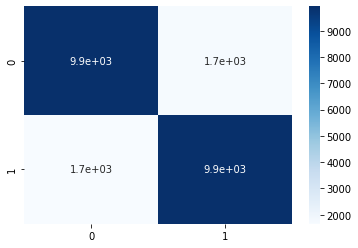

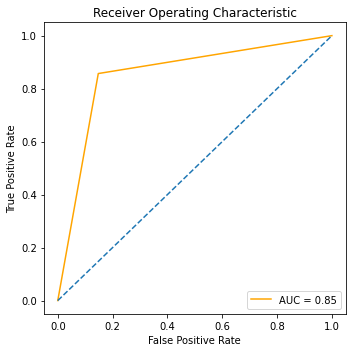

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_DT=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["CART_ALGO"] = Evl_DT#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'CART_ALGO': [0.8545760082730093,
  0.8518454787920502,
  0.8569326640124633,
  0.8543814988997713]}

In [ ]:
clf=tree.DecisionTreeClassifier()

In [ ]:
param_grid = {#'max_features': ['auto', 'sqrt', 'log2','none'],
              #'max_depth' : ['none'],
              'criterion' :['entropy']
             }

In [ ]:
#tree_class=tree.DecisionTreeClassifier(random_state=1024)
clf_grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10, verbose=True,scoring='accuracy')
# Performing training
clf_grid.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy']}, scoring='accuracy',
             verbose=True)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy'}
accuracy : 0.8500426440701622


---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.849189934505343


Accuracy_test_set:  0.849189934505343


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     11689
           1       0.84      0.85      0.85     11519

    accuracy                           0.85     23208
   macro avg       0.85      0.85      0.85     23208
weighted avg       0.85      0.85      0.85     23208



Confusion_Matrix_of model : 
 [[9887 1802]
 [1698 9821]]
0.8492146690492078
0.8492146690492078


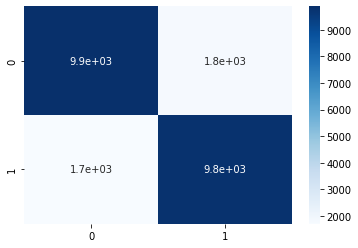

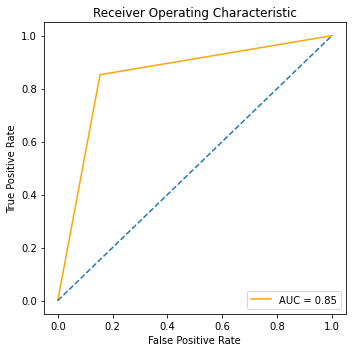

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_grid.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_DT=Evaluation(y_test, clf_grid.predict(X_test))
collect_results_of_all_model["CART_ALGO"] = Evl_DT#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'CART_ALGO': [0.849189934505343,
  0.844962574206315,
  0.8525913707787134,
  0.8487598306110102]}

#  Supervised ML Classifier with LogisticRegression

In [ ]:
clf_ST=LogisticRegression()
clf_ST.fit(X_train, y_train)

LogisticRegression()

In [ ]:
clf_ST.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.9366166839021027


Accuracy_test_set:  0.9366166839021027


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     11816
           1       0.93      0.95      0.94     11392

    accuracy                           0.94     23208
   macro avg       0.94      0.94      0.94     23208
weighted avg       0.94      0.94      0.94     23208



Confusion_Matrix_of model : 
 [[10965   851]
 [  620 10772]]
0.9367774271032232
0.9367774271032232


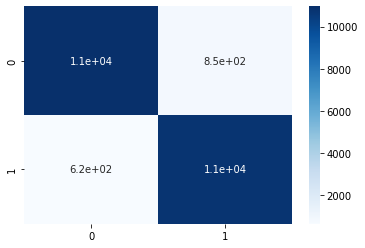

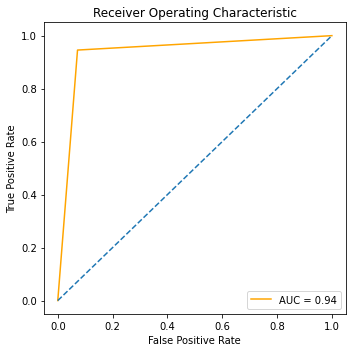

In [ ]:

print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_LR=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["LR_ALGO"] = Evl_LR#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'LR_ALGO': [0.9366166839021027,
  0.926783102469242,
  0.9455758426966292,
  0.9360851618509668]}

In [ ]:
clf = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='f1_macro')

In [ ]:
scores.mean()

0.9370454063759208

In [ ]:
clf=LogisticRegression()
clf.fit(X_train, y_train)
train_predictioons = clf.predict(X_train)
test_predictions = clf.predict(X_test)

In [ ]:
print(f1_score(train_predictioons, y_train))
print(f1_score(test_predictions, y_test))

0.9442190131093281
0.9360851618509668


In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2'],
   'solver' : ['lbfgs','sag'],
    'max_iter' : [100, 500]
    }
]

# Creating GridSearchCV model:
clf_grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

In [ ]:
clf_grid.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.9370505388518486


In [ ]:
clf_grid.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(),
 'n_jobs': None,
 'param_grid': [{'penalty': ['l1', 'l2'],
   'solver': ['lbfgs', 'sag'],
   'max_iter': [100, 500]}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.9366166839021027


Accuracy_test_set:  0.9366166839021027


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     11816
           1       0.93      0.95      0.94     11392

    accuracy                           0.94     23208
   macro avg       0.94      0.94      0.94     23208
weighted avg       0.94      0.94      0.94     23208



Confusion_Matrix_of model : 
 [[10965   851]
 [  620 10772]]
0.9367774271032232
0.9367774271032232


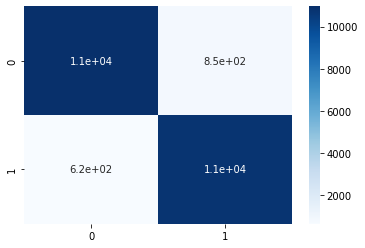

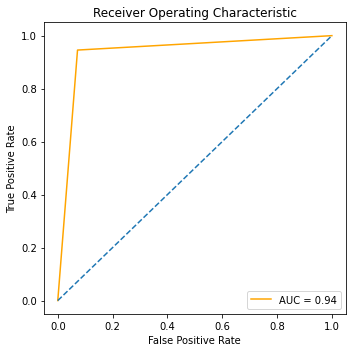

In [ ]:

print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_grid.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_LR=Evaluation(y_test, clf_grid.predict(X_test))
collect_results_of_all_model["LR_ALGO"] = Evl_LR#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'LR_ALGO': [0.9366166839021027,
  0.926783102469242,
  0.9455758426966292,
  0.9360851618509668]}

In [ ]:
clf_ST=MultinomialNB()
clf_ST.fit(X_train.toarray(), y_train)

MultinomialNB()

---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.9050327473285074


Accuracy_test_set:  0.9050327473285074


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     10827
           1       0.94      0.88      0.91     12381

    accuracy                           0.91     23208
   macro avg       0.90      0.91      0.90     23208
weighted avg       0.91      0.91      0.91     23208



Confusion_Matrix_of model : 
 [[10104   723]
 [ 1481 10900]]
0.9068018643051258
0.9068018643051258


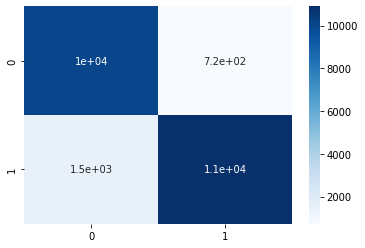

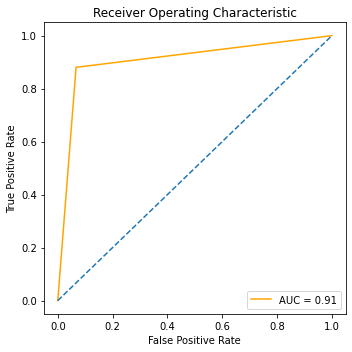

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test.toarray(), y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_NAV=Evaluation(y_test, clf_ST.predict(X_test.todense()))
collect_results_of_all_model["NAV_ALGO"] = Evl_NAV#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'NAV_ALGO': [0.9050327473285074,
  0.9377957498064183,
  0.8803812293029643,
  0.9081819696717214]}

In [ ]:
clf_NB=MultinomialNB()

In [ ]:
param_grid = { 'alpha': [1.0],
      'class_prior':[ None,'n_classes'],
      'fit_prior': [True]
      }

In [ ]:
clf_grid = GridSearchCV(clf_NB, param_grid, cv= 10)
clf_grid.fit(X_train.toarray(),y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)


tuned hpyerparameters :(best parameters)  {'alpha': 1.0, 'class_prior': None, 'fit_prior': True}
accuracy : 0.8999577825028504


---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.9055498104102033


Accuracy_test_set:  0.9055498104102033


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      1361
           1       0.94      0.88      0.91      1540

    accuracy                           0.91      2901
   macro avg       0.91      0.91      0.91      2901
weighted avg       0.91      0.91      0.91      2901



Confusion_Matrix_of model : 
 [[1267   94]
 [ 180 1360]]
0.9070250102579271
0.9070250102579271


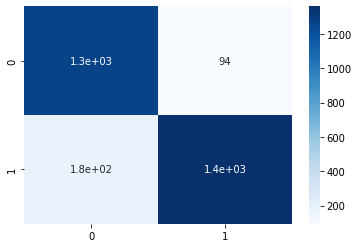

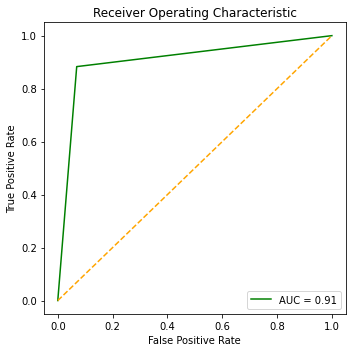

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_grid.score(X_test.toarray(), y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_NAV=Evaluation(y_test, clf_grid.predict(X_test.todense()))
collect_results_of_all_model["NAV_ALGO"] = Evl_NAV#get results of CART algo

In [ ]:
clf_Rand=RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    #'n_estimators': [200, 500],
    'max_features': ['auto'],
    #'max_depth' : [5,10],
    'criterion' :['gini']
}


In [ ]:
clf_grid = GridSearchCV(clf_Rand, param_grid, cv= 10)
clf_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_features': ['auto']})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_features': 'auto'}
accuracy : 0.9015158251969471


---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.9045156842468114


Accuracy_test_set:  0.9045156842468114


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     11333
           1       0.92      0.90      0.91     11875

    accuracy                           0.90     23208
   macro avg       0.90      0.90      0.90     23208
weighted avg       0.90      0.90      0.90     23208



Confusion_Matrix_of model : 
 [[10351   982]
 [ 1234 10641]]
0.9047173015924617
0.9047173015924617


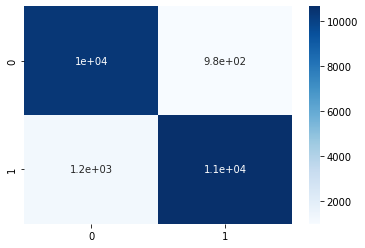

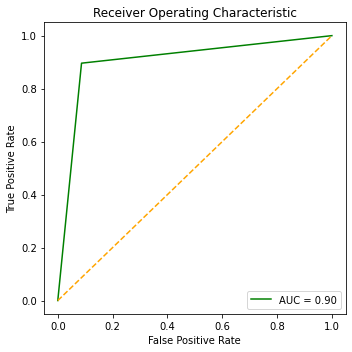

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_grid.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_RF=Evaluation(y_test, clf_grid.predict(X_test))
collect_results_of_all_model["RF_ALGO"] = Evl_RF#get results of CART algo


In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'RF_ALGO': [0.9045156842468114,
  0.9155123462101007,
  0.8960842105263158,
  0.9056941016256703]}

In [ ]:
#without grid
clf_ST=RandomForestClassifier()
#clf_ST.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_ST, X_train, y_train, cv=10, scoring='f1_macro')

In [ ]:
scores.mean()

0.8849011614137157

In [ ]:
clf_ST=RandomForestClassifier()
clf_ST.fit(X_train, y_train)
train_predictioons = clf_ST.predict(X_train)
test_predictions = clf_ST.predict(X_test)

In [ ]:
print(f1_score(train_predictioons, y_train))
print(f1_score(test_predictions, y_test))

0.9992676251782754
0.9034032313509798


In [ ]:
clf_ST=RandomForestClassifier()

In [ ]:
clf_ST.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
clf_ST.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.9036108238538435


Accuracy_test_set:  0.9036108238538435


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     11348
           1       0.91      0.90      0.90     11860

    accuracy                           0.90     23208
   macro avg       0.90      0.90      0.90     23208
weighted avg       0.90      0.90      0.90     23208



Confusion_Matrix_of model : 
 [[10348  1000]
 [ 1237 10623]]
0.9037892882596334
0.9037892882596334


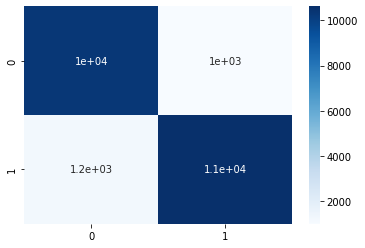

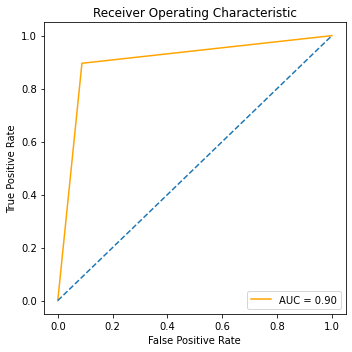

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_RF=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["RF_ALGO"] = Evl_RF#get results of CART algo


In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'RF_ALGO': [0.9036108238538435,
  0.9139636926783102,
  0.8956998313659359,
  0.9047395988587488]}

In [ ]:
KNN=KNeighborsClassifier(leaf_size=30,metric= 'minkowski',algorithm='auto')

In [ ]:
params = {'n_neighbors':[10]
         #'leaf_size':list(range(30,50))
         }

In [ ]:
clf_grid = GridSearchCV(KNN, params, cv = 10,scoring = "accuracy")
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10]}, scoring='accuracy')

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 10}
accuracy : 0.5362481299021179


---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.5392967942088935


Accuracy_test_set:  0.5392967942088935


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.99      0.52      0.68     21953
           1       0.09      0.87      0.17      1255

    accuracy                           0.54     23208
   macro avg       0.54      0.70      0.43     23208
weighted avg       0.94      0.54      0.65     23208



Confusion_Matrix_of model : 
 [[11423 10530]
 [  162  1093]]
0.6956276202528291
0.6956276202528291


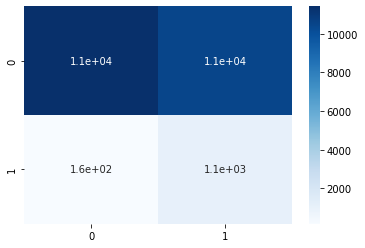

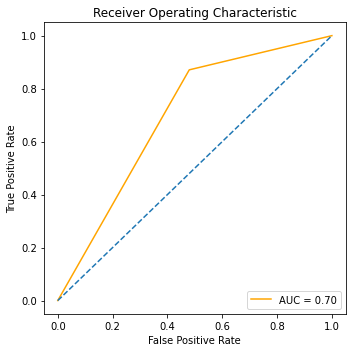

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_grid.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_KNN=Evaluation(y_test, clf_grid.predict(X_test))
collect_results_of_all_model["KNN_ALGO"] = Evl_KNN#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'KNN_ALGO': [0.5392967942088935,
  0.0940376839026069,
  0.8709163346613545,
  0.16974685510172385]}

In [ ]:
KNN=KNeighborsClassifier(leaf_size=30,metric= 'minkowski',algorithm='auto')

In [ ]:
params = {'n_neighbors':[10]
         #'leaf_size':list(range(30,50))
         }

In [ ]:
clf_grid = GridSearchCV(KNN, params, cv = 10,scoring = "accuracy")
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [10]}, scoring='accuracy')

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 10}
accuracy : 0.5076891460490622


---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.5069372630127542


Accuracy_test_set:  0.5069372630127542


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.99      0.50      0.67     22790
           1       0.03      0.72      0.05       418

    accuracy                           0.51     23208
   macro avg       0.51      0.61      0.36     23208
weighted avg       0.97      0.51      0.66     23208



Confusion_Matrix_of model : 
 [[11466 11324]
 [  119   299]]
0.6092132031382856
0.6092132031382856


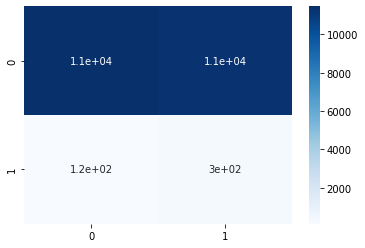

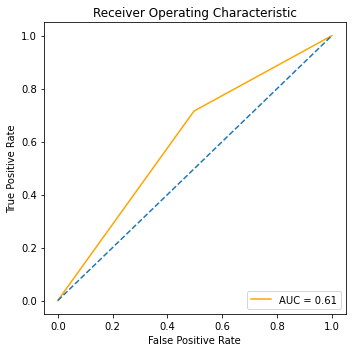

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_grid.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_KNN=Evaluation(y_test, clf_grid.predict(X_test))
collect_results_of_all_model["KNN_ALGO"] = Evl_KNN#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'KNN_ALGO': [0.5069372630127542,
  0.025724855889185237,
  0.715311004784689,
  0.049663649198571545]}

In [ ]:
clf_ST=KNeighborsClassifier(n_neighbors=20)
clf_ST.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [ ]:
clf_ST.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'p': 2,
 'weights': 'uniform'}

---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.5033178214408824


Accuracy_test_set:  0.5033178214408824


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67     23038
           1       0.01      0.78      0.02       170

    accuracy                           0.50     23208
   macro avg       0.50      0.64      0.34     23208
weighted avg       0.99      0.50      0.66     23208



Confusion_Matrix_of model : 
 [[11548 11490]
 [   37   133]]
0.6418058655009881
0.6418058655009881


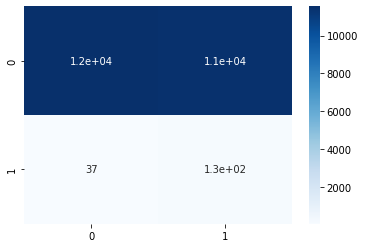

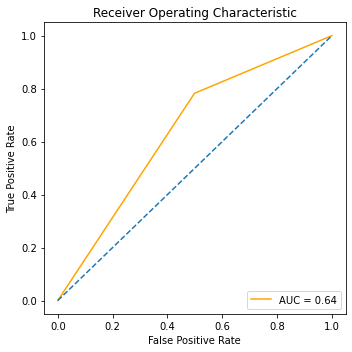

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_KNN=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["KNN_ALGO"] = Evl_KNN#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'KNN_ALGO': [0.5033178214408824,
  0.011442828873784738,
  0.7823529411764706,
  0.022555753413041637]}

---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.5284815580834195


Accuracy_test_set:  0.5284815580834195


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.99      0.51      0.68     22244
           1       0.07      0.85      0.13       964

    accuracy                           0.53     23208
   macro avg       0.53      0.68      0.40     23208
weighted avg       0.95      0.53      0.65     23208



Confusion_Matrix_of model : 
 [[11443 10801]
 [  142   822]]
0.6835639765975402
0.6835639765975402


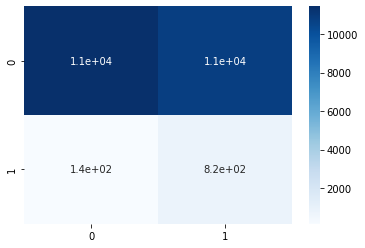

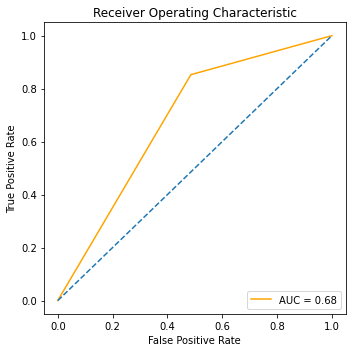

In [ ]:
#default
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_KNN=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["KNN_ALGO"] = Evl_KNN#get results of CART algo

In [ ]:
clf_ST=KNeighborsClassifier(n_neighbors=15)
clf_ST.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.5346863150637711


Accuracy_test_set:  0.5346863150637711


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.98      0.52      0.68     22028
           1       0.09      0.85      0.16      1180

    accuracy                           0.53     23208
   macro avg       0.54      0.68      0.42     23208
weighted avg       0.94      0.53      0.65     23208



Confusion_Matrix_of model : 
 [[11407 10621]
 [  178  1002]]
0.6834967360493425
0.6834967360493425


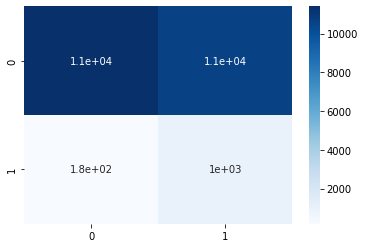

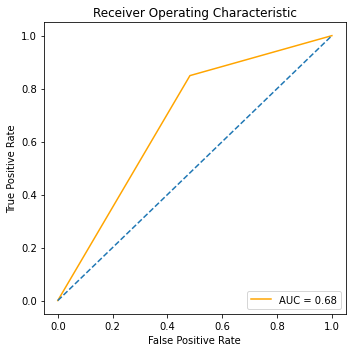

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_KNN=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["KNN_ALGO"] = Evl_KNN#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'KNN_ALGO': [0.5346863150637711,
  0.08620837993633314,
  0.8491525423728814,
  0.1565258142622823]}

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'KNN_ALGO': [0.5171492588762495,
  0.09188677621956466,
  0.6212914485165794,
  0.16009593764053365]}

In [ ]:
clf_ST=KNeighborsClassifier(n_neighbors=10)
clf_ST.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
clf_ST.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.5392967942088935


Accuracy_test_set:  0.5392967942088935


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.99      0.52      0.68     21953
           1       0.09      0.87      0.17      1255

    accuracy                           0.54     23208
   macro avg       0.54      0.70      0.43     23208
weighted avg       0.94      0.54      0.65     23208



Confusion_Matrix_of model : 
 [[11423 10530]
 [  162  1093]]
0.6956276202528291
0.6956276202528291


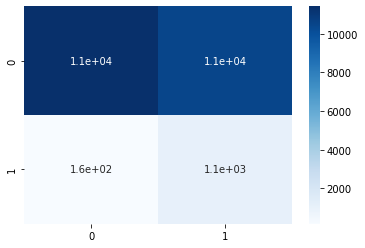

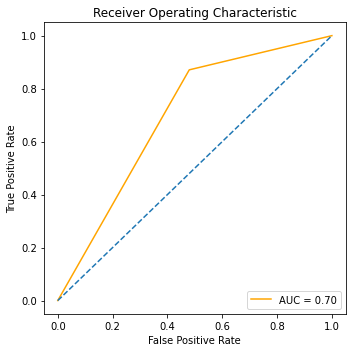

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_KNN=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["KNN_ALGO"] = Evl_KNN#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'KNN_ALGO': [0.5392967942088935,
  0.0940376839026069,
  0.8709163346613545,
  0.16974685510172385]}

In [ ]:
#sgd with grid
clf_sgd=SGDClassifier()
param_grid = [{'alpha': [0.0001, 0.1, 1.0],
               'loss': ['modified_huber'],
               'penalty': ['l2']}]

In [ ]:
clf_grid = GridSearchCV(clf_sgd, param_grid, cv= 10,
                   scoring='accuracy')
# Fit the data to the pipeline with gridsearch
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(),
             param_grid=[{'alpha': [0.0001, 0.1, 1.0],
                          'loss': ['modified_huber'], 'penalty': ['l2']}],
             scoring='accuracy')

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'alpha': 0.0001, 'loss': 'modified_huber', 'penalty': 'l2'}
accuracy : 0.9360977802880441


---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.9360565322302654


Accuracy_test_set:  0.9360565322302654


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     11827
           1       0.93      0.95      0.94     11381

    accuracy                           0.94     23208
   macro avg       0.94      0.94      0.94     23208
weighted avg       0.94      0.94      0.94     23208



Confusion_Matrix_of model : 
 [[10964   863]
 [  621 10760]]
0.9362333718245259
0.9362333718245259


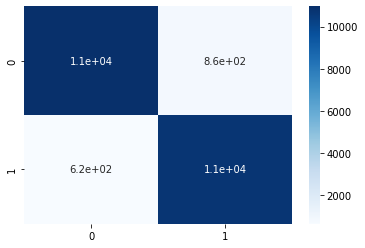

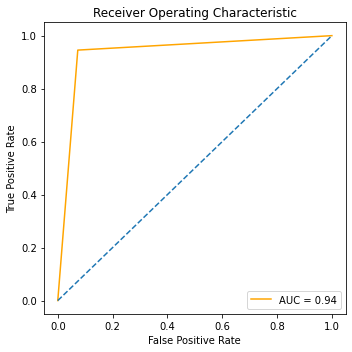

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_grid.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_SGD=Evaluation(y_test, clf_grid.predict(X_test))
collect_results_of_all_model["SGD_ALGO"] = Evl_SGD#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'RF_ALGO': [0.9036108238538435,
  0.9139636926783102,
  0.8956998313659359,
  0.9047395988587488],
 'SGD_ALGO': [0.9360565322302654,
  0.9257506667813817,
  0.945435374747386,
  0.935489480090419]}

In [ ]:
#without grid
clf_ST=SGDClassifier(loss="modified_huber"
                     )
clf_ST.fit(X_train, y_train)

SGDClassifier(loss='modified_huber')

In [ ]:
clf_ST.get_params()

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.0,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'modified_huber',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.936271975180972


Accuracy_test_set:  0.936271975180972


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     11840
           1       0.93      0.95      0.94     11368

    accuracy                           0.94     23208
   macro avg       0.94      0.94      0.94     23208
weighted avg       0.94      0.94      0.94     23208



Confusion_Matrix_of model : 
 [[10973   867]
 [  612 10756]]
0.9364691607071532
0.9364691607071532


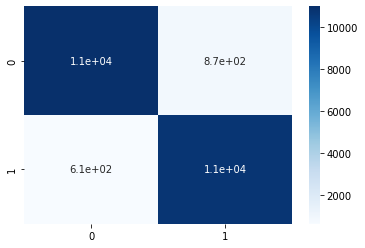

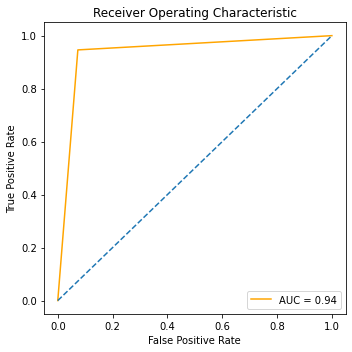

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_SGD=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["SGD_ALGO"] = Evl_SGD#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'RF_ALGO': [0.9036108238538435,
  0.9139636926783102,
  0.8956998313659359,
  0.9047395988587488],
 'SGD_ALGO': [0.936271975180972,
  0.925406521552095,
  0.946164672765658,
  0.9356704797529469]}

In [ ]:
clf_ab = AdaBoostClassifier()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=clf_ab, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')

# execute the grid search
grid_clf = grid_search.fit(X_train, y_train)


KeyboardInterrupt: ignored

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

In [ ]:
clf_ST=AdaBoostClassifier()
# Fit the model
clf_ST.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
clf_ST.get_params()


{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.8778438469493278


Accuracy_test_set:  0.8778438469493278


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88     12662
           1       0.83      0.92      0.87     10546

    accuracy                           0.88     23208
   macro avg       0.88      0.88      0.88     23208
weighted avg       0.88      0.88      0.88     23208



Confusion_Matrix_of model : 
 [[10706  1956]
 [  879  9667]]
0.8810864486600706
0.8810864486600706


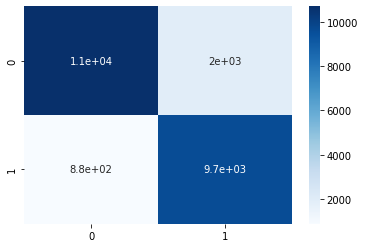

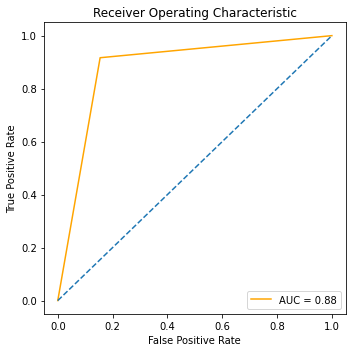

In [ ]:

print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_ADA=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["ADA_ALGO"] = Evl_ADA#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'ADA_ALGO': [0.8778438469493278,
  0.8317129828787748,
  0.9166508628864024,
  0.8721187243448058]}

In [ ]:
clf_Ada=AdaBoostClassifier()

In [ ]:
param_grid = [{'algorithm': ['SAMME.R'],
              'base_estimator':[None],
              'learning_rate': [1.0]}
              ]

In [ ]:
clf_grid = GridSearchCV(clf_Ada, param_grid, cv= 10,
                   scoring='accuracy')
# Fit the data to the pipeline with gridsearch
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid=[{'algorithm': ['SAMME.R'], 'base_estimator': [None],
                          'learning_rate': [1.0]}],
             scoring='accuracy')

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0}
accuracy : 0.8779792005005105


---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.8778438469493278


Accuracy_test_set:  0.8778438469493278


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.92      0.85      0.88     12662
           1       0.83      0.92      0.87     10546

    accuracy                           0.88     23208
   macro avg       0.88      0.88      0.88     23208
weighted avg       0.88      0.88      0.88     23208



Confusion_Matrix_of model : 
 [[10706  1956]
 [  879  9667]]
0.8810864486600706
0.8810864486600706


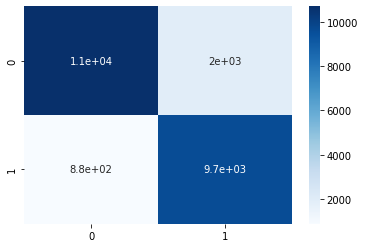

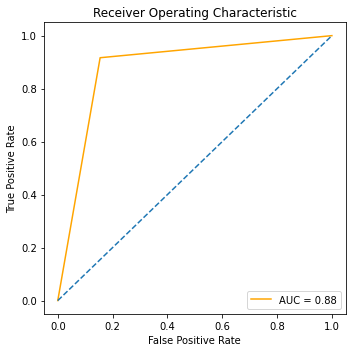

In [ ]:

print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_ST.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_ADA=Evaluation(y_test, clf_ST.predict(X_test))
collect_results_of_all_model["ADA_ALGO"] = Evl_ADA#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'ADA_ALGO': [0.8778438469493278,
  0.8317129828787748,
  0.9166508628864024,
  0.8721187243448058]}

In [ ]:
clf_svm = LinearSVC(penalty='l1', max_iter=500, dual=False)

In [ ]:
param_grid = {  'C': [100, 1000]
              }


In [ ]:
clf_grid = GridSearchCV(clf_svm, param_grid, cv=10, scoring='accuracy')

In [ ]:
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVC(dual=False, max_iter=500, penalty='l1'),
             param_grid={'C': [100, 1000]}, scoring='accuracy')

In [ ]:
print("tuned hpyerparameters :(best parameters) ",clf_grid.best_params_)
print("accuracy :",clf_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100}
accuracy : 0.930812096238882


---------- Supervised Model - Evaluation on Test Data ----------
Accuracy Score:  0.9309289900034471


Accuracy_test_set:  0.9309289900034471


Classification_report_of_model : 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     11770
           1       0.92      0.94      0.93     11438

    accuracy                           0.93     23208
   macro avg       0.93      0.93      0.93     23208
weighted avg       0.93      0.93      0.93     23208



Confusion_Matrix_of model : 
 [[10876   894]
 [  709 10729]]
0.9310289094334897
0.9310289094334897


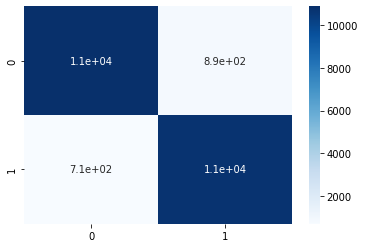

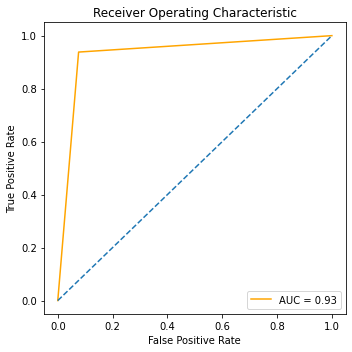

In [ ]:
print('---------- Supervised Model - Evaluation on Test Data ----------')
accuracy_score_ST = clf_grid.score(X_test, y_test)
print('Accuracy Score: ', accuracy_score_ST)
Evl_RF=Evaluation(y_test, clf_grid.predict(X_test))
collect_results_of_all_model["SVM_ALGO"] = Evl_RF#get results of CART algo

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'SVM_ALGO': [0.9309289900034471,
  0.9230835412544094,
  0.9380136387480329,
  0.9304887038723386]}

In [ ]:
collect_results_of_all_model

{'Metrics': ['accuracy', 'precision', 'recall', 'f1-score'],
 'RF_ALGO': [0.8203636677007928,
  0.8102899423556741,
  0.8274468458970304,
  0.8187785264073028],
 'KNN_ALGO': [0.7838245432609445,
  0.7140153144627033,
  0.830564451561249,
  0.7678926671293083],
 'ADA_ALGO': [0.822992071699414,
  0.7808655252516562,
  0.8532480962677447,
  0.8154537286612759],
 'CART_ALGO': [0.7661151327128576,
  0.7294158134732858,
  0.7878449958182325,
  0.757505360972123],
 'LR_ALGO': [0.8205360220613581,
  0.8114084143508561,
  0.8269905296387232,
  0.8191253745602988],
 'NAV_ALGO': [0.5904860392967942,
  0.978921104706186,
  0.5513398265251732,
  0.7053936763794172],
 'SGD_ALGO': [0.8200620475698035,
  0.8089993977458487,
  0.8278017431111894,
  0.8182925767992342]}

In [ ]:
metrics_data_frame = pd.DataFrame(collect_results_of_all_model)#create dataframe
metrics_data_frame = metrics_data_frame.set_index('Metrics')#set index
# displaying the DataFrame
print(tabulate(metrics_data_frame, headers = 'keys', tablefmt = 'psql'))#convert results in to table

+-----------+-----------+------------+------------+-------------+-----------+------------+------------+
| Metrics   |   RF_ALGO |   KNN_ALGO |   ADA_ALGO |   CART_ALGO |   LR_ALGO |   NAV_ALGO |   SGD_ALGO |
|-----------+-----------+------------+------------+-------------+-----------+------------+------------|
| accuracy  |  0.820364 |   0.783825 |   0.822992 |    0.766115 |  0.820536 |   0.590486 |   0.820062 |
| precision |  0.81029  |   0.714015 |   0.780866 |    0.729416 |  0.811408 |   0.978921 |   0.808999 |
| recall    |  0.827447 |   0.830564 |   0.853248 |    0.787845 |  0.826991 |   0.55134  |   0.827802 |
| f1-score  |  0.818779 |   0.767893 |   0.815454 |    0.757505 |  0.819125 |   0.705394 |   0.818293 |
+-----------+-----------+------------+------------+-------------+-----------+------------+------------+


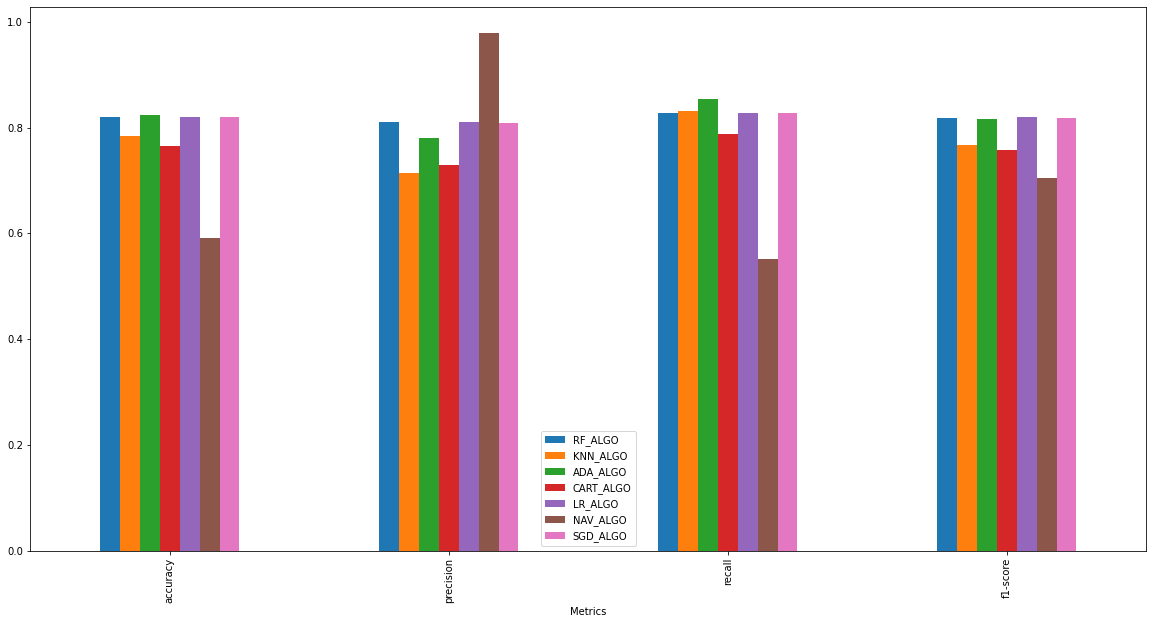

In [ ]:
metrics_data_frame.plot(kind='bar', figsize=(20,10))#sho comparison base of mertics
plt.show()

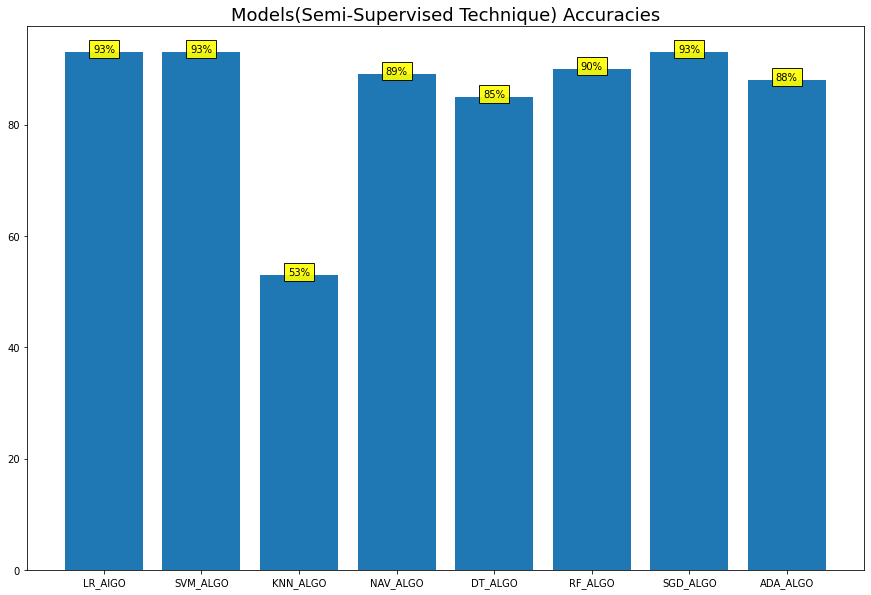

In [ ]:
# importing library
import matplotlib.pyplot as plt

# function to add value labels
def addlabels(names,acc):
    for i in range(len(names)):
         plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))


if __name__ == '__main__':

    # creating data on which bar chart will be plot
    models_names = ["LR_AlGO","SVM_ALGO","KNN_ALGO","NAV_ALGO","DT_ALGO","RF_ALGO","SGD_ALGO","ADA_ALGO"]
    models_accuracy = [93, 93, 53, 89, 85, 90, 93, 88]

    # setting figure size by using figure() function
    plt.figure(figsize = (15,10))

    # making the bar chart on the data
    plt.bar(models_names,models_accuracy)

    # calling the function to add value labels
    addlabels(models_names,models_accuracy)

    # giving title to the plot
    plt.title("Models(Semi-Supervised Technique) Accuracies", fontsize=18)#title

    # giving X and Y labels
    #plt.xlabel("Courses")
    #plt.ylabel("Number of Admissions")

    # visualizing the plot
    plt.show()